In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [15]:
dataset = pd.read_csv('psglgd.csv').iloc[:, 2:]
dataset.head()

,opposing_team_id,side,duration,my_hero_1,my_hero_2,my_hero_3,my_hero_4,my_hero_5,opposing_hero_1,opposing_hero_2,opposing_hero_3,opposing_hero_4,opposing_hero_5,my_team_kills,opposing_team_kills,gold_adv,xp_adv,my_tower_status,opposing_team_tower_status,win
0,7732977,dire,1901,136,11,61,87,17,85,123,43,46,19,28,13,19623,18197,1974,1536,1
1,7732977,radiant,1613,137,52,91,18,7,129,119,74,68,10,22,6,24806,29717,1983,1572,1
2,6209804,radiant,1672,137,66,114,38,119,11,88,128,120,64,32,9,15500,16130,1983,1536,1
3,2163,radiant,2583,33,19,110,13,10,85,120,86,35,2,20,25,10673,18586,1956,288,1
4,2163,radiant,2785,33,19,25,87,54,137,85,52,38,99,32,29,14209,32044,1828,0,1


In [16]:
pd.DataFrame({'columns': dataset.columns.tolist()})

,columns
0,opposing_team_id
1,side
2,duration
3,my_hero_1
4,my_hero_2
5,my_hero_3
6,my_hero_4
7,my_hero_5
8,opposing_hero_1
9,opposing_hero_2


# opposing_team_id
# side
# duration
# gold_adv
# xp_adv

In [17]:
X = dataset.iloc[:, [0, 1, 2, 15, 16]].values #16-17 too dependent
y = dataset.iloc[:, 19].values

In [18]:
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
X[0]

array([115, 0, 1901, 19623, 18197], dtype=object)

In [20]:
y

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
results = []

# CART gini

In [23]:
criterion = 'gini'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'CART', 
    'criterion': criterion,
    'accuracy_score': acc
    })

0.9128205128205128


# ID3 C4.5 entropy

In [24]:
criterion = 'entropy'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'C4.5',
    'criterion': criterion,
    'accuracy_score': acc
    })

0.9256410256410257


# Extra Trees Classifier

In [25]:
criterions = ['gini', 'entropy', 'log_loss']
n_estimators_arr = [10, 20, 50, 100, 150]
etc_results = []

for criterion in criterions:
    for n_estimators in n_estimators_arr:
        classifier = ExtraTreesClassifier(criterion=criterion, n_estimators=n_estimators, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        etc_results.append({
            'criterion': criterion,
            'n_estimators': n_estimators, 
            'accuracy_score': accuracy_score(y_test, y_pred)})

result = max(etc_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Extra Trees Classifier'
results.append(result)

0.9487179487179487


# Gradient Boosting

In [26]:
loss_arr = ['log_loss']
learning_rate_arr = [0.1, 0.2, 1]
n_estimators_arr = [50, 100, 150] #this param need to change
criterion_arr = ['friedman_mse', 'squared_error']
max_depth_arr = [2, 3, 4]
gb_results = []

for loss in loss_arr:
    for learning_rate in learning_rate_arr:
        for n_estimators in n_estimators_arr:
            for criterion in criterion_arr:
                for max_depth in max_depth_arr:
                    classifier = GradientBoostingClassifier(loss=loss, n_estimators=n_estimators, learning_rate=learning_rate, criterion=criterion, max_depth=max_depth, random_state=1)
                    classifier.fit(X_train, y_train)
                    y_pred = classifier.predict(X_test)
                    gb_results.append({
                        'loss': loss,
                        'learning_rate': learning_rate,
                        'n_estimators': n_estimators,
                        'criterion': criterion,
                        'max_depth': max_depth,
                        'accuracy_score': accuracy_score(y_test, y_pred)
                    })

result = max(gb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Gradient Boosting'
results.append(result)

0.9538461538461539


# Hist Gradient Boosting

In [27]:
learning_rate_arr = [0.1, 0.2, 0.5, 1]
max_iter_arr = [10, 50, 100, 150]
hgb_results = []

for learning_rate in learning_rate_arr:
    for max_iter in max_iter_arr:
        classifier = HistGradientBoostingClassifier(learning_rate=learning_rate, max_iter=max_iter, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        hgb_results.append({
            'learning_rate': learning_rate,
            'max_iter': max_iter,
            'accuracy_score': accuracy_score(y_test, y_pred)
        })

result = max(hgb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Hist Gradient Boosting'
results.append(result)

0.9538461538461539


# Random Forest gini

In [28]:
n_estimators_arr = [10, 20, 50, 100, 150]
criterion_arr = ['gini', 'entropy']
rf_results = []

for n_estimators in n_estimators_arr:
    for criterion in criterion_arr:
        classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        rf_results.append({
            'n_estimators': n_estimators,
            'criterion': criterion,
            'accuracy_score': accuracy_score(y_test, y_pred)
        })

result = max(rf_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Random Forest'
results.append(result)

0.9512820512820512


# Adaboost

In [29]:
n_estimators_arr = [10, 20, 50, 100, 150]
learning_rate_arr = [0.1, 0.2, 0.5, 1]
algorithm_arr = ['SAMME', 'SAMME.R']
ada_results = []

for n_estimators in n_estimators_arr:
    for learning_rate in learning_rate_arr:
        for algorithm in algorithm_arr:
            classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm, random_state=0)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            ada_results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'algorithm': algorithm,
                'accuracy_score': accuracy_score(y_test, y_pred)
            })

result = max(ada_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Adaboost'
results.append(result)

0.9512820512820512


In [30]:
results

[{'classifier': 'CART',
  'criterion': 'gini',
  'accuracy_score': 0.9128205128205128},
 {'classifier': 'C4.5',
  'criterion': 'entropy',
  'accuracy_score': 0.9256410256410257},
 {'criterion': 'entropy',
  'n_estimators': 100,
  'accuracy_score': 0.9487179487179487,
  'classifier': 'Extra Trees Classifier'},
 {'loss': 'log_loss',
  'learning_rate': 0.1,
  'n_estimators': 100,
  'criterion': 'friedman_mse',
  'max_depth': 2,
  'accuracy_score': 0.9538461538461539,
  'classifier': 'Gradient Boosting'},
 {'learning_rate': 0.2,
  'max_iter': 10,
  'accuracy_score': 0.9538461538461539,
  'classifier': 'Hist Gradient Boosting'},
 {'n_estimators': 20,
  'criterion': 'entropy',
  'accuracy_score': 0.9512820512820512,
  'classifier': 'Random Forest'},
 {'n_estimators': 10,
  'learning_rate': 0.1,
  'algorithm': 'SAMME',
  'accuracy_score': 0.9512820512820512,
  'classifier': 'Adaboost'}]

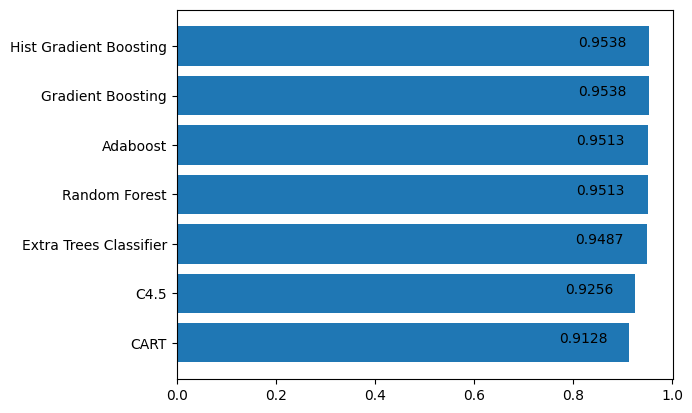

In [31]:
plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame(results)

df_sorted = df.sort_values('accuracy_score')

ax.barh('classifier', 'accuracy_score', data=df_sorted)
for i in range(len(results)):
    ax.text(results[i]['accuracy_score'] * 0.9, results[i]['classifier'], round(results[i]['accuracy_score'], 4), ha='center', color='black')
